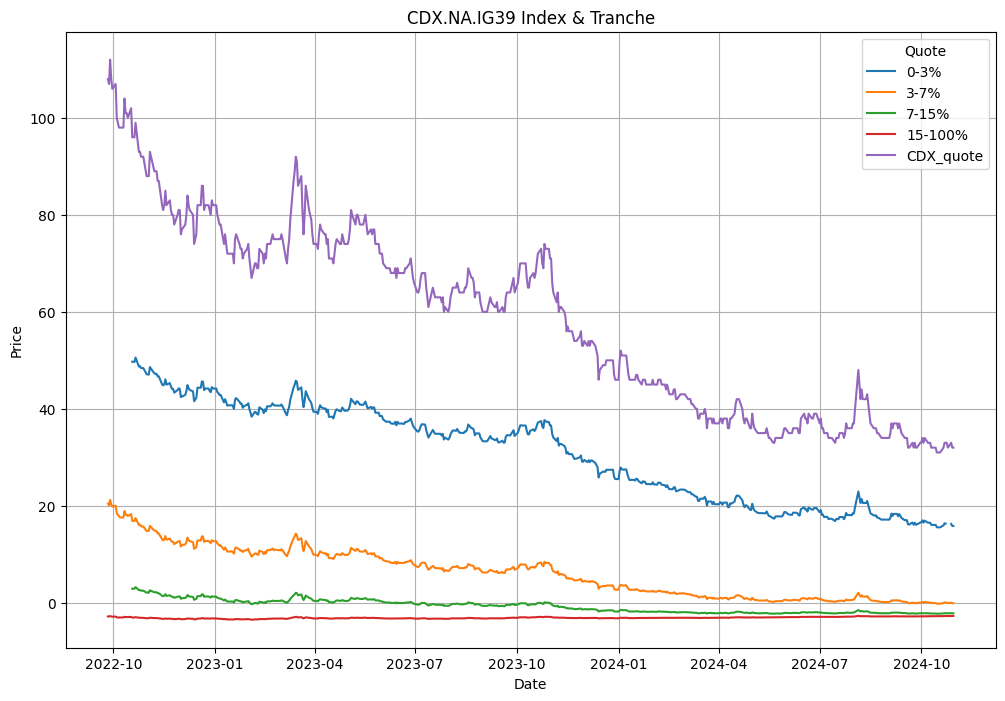

        Date  Price_0-3%  Percent Change_0-3%  Price_3-7%  \
0 2022-10-18      49.730                  NaN      16.901   
1 2022-10-19      49.692            -0.000764      16.886   
2 2022-10-20      49.681            -0.000221      16.830   
3 2022-10-21      50.584             0.018176      17.489   
4 2022-10-24      48.750            -0.036257      16.053   

   Percent Change_3-7%  Price_7-15%  Percent Change_7-15%  Price_15-100%  \
0            -0.075943        2.915                   NaN         -3.043   
1            -0.000888        2.887             -0.009605         -3.038   
2            -0.003316        2.906              0.006581         -3.032   
3             0.039156        3.234              0.112870         -2.956   
4            -0.082109        2.604             -0.194805         -3.081   

   Percent Change_15-100%  Price_index  Percent Change_index  
0                0.044269         96.0             -0.058824  
1               -0.001643         96.0            

/var/folders/g5/t7j1zvnx6cl8hpbmv534dj4c0000gn/T/ipykernel_41647/612253638.py:37: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Percent Change'] = df['Price'].pct_change()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/xinyili/Desktop/credit risk/Project/CDX.NA.IG39 Tranche data.xlsx'
table = pd.read_excel(file_path, sheet_name=None, usecols=[1, 2], header=0)


def process_sheet(df):
    df.columns = ['Date', 'Price']
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df.sort_values('Date', inplace=True)
    return df


for sheet_name, df in table.items():
    table[sheet_name] = process_sheet(df)


plt.figure(figsize=(12, 8))
for sheet_name, df in table.items():
    plt.plot(df['Date'], df['Price'], label=sheet_name)


plt.title("CDX.NA.IG39 Index & Tranche")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Quote")
plt.grid(True)
plt.show()


filter = {}
for sheet_name, df in table.items():
    df['Percent Change'] = df['Price'].pct_change()
    daily_thre = df[abs(df['Percent Change']) > 0.1]
    if not daily_thre.empty:
        filter[sheet_name] = daily_thre


tranche1_df = table['0-3%']
tranche2_df = table['3-7%']
tranche3_df = table['7-15%']
tranche4_df = table['15-100%']
index_df = table['CDX_quote']

merged_data = tranche1_df.merge(tranche2_df, on='Date', suffixes=('_0-3%', '_3-7%'))
merged_data = merged_data.merge(tranche3_df, on='Date', suffixes=('', '_7-15%'))
merged_data = merged_data.merge(tranche4_df, on='Date', suffixes=('', '_15-100%'))
merged_df = merged_data.merge(index_df, on='Date', suffixes=('', '_index'))
merged_df.rename(columns={'Price':'Price_7-15%', 'Percent Change':'Percent Change_7-15%'}, inplace=True)


print(merged_df.head())


In [26]:
# output_path = '/Users/xinyili/Desktop/credit risk/Project/credit_risk_merged_data.csv'
# merged_df.to_csv(output_path, index=False)

# print(f"the file was downloaded successfullt: {output_path}")

Gaussian Coupla

In [27]:
import pandas as pd


file_path = 'CDS of every issuer.xlsx'
df = pd.read_excel(file_path)


print(df)


print(df.head())


print(df.columns)


           Date  Calpine Corp  NRG Energy Inc  American Electric Power Co Inc  \
0    2024-10-24       158.996         135.161                          36.819   
1    2024-10-23       158.562         131.085                          35.951   
2    2024-10-22       158.544         131.851                          36.118   
3    2024-10-21       156.942         129.798                          36.106   
4    2024-10-18       156.702         126.326                          35.911   
...         ...           ...             ...                             ...   
1301        NaT           NaN             NaN                             NaN   
1302        NaT           NaN             NaN                             NaN   
1303        NaT           NaN             NaN                             NaN   
1304        NaT           NaN             NaN                             NaN   
1305        NaT           NaN             NaN                             NaN   

      National Rural Utilit

In [28]:
import pandas as pd

# Function to filter a single sheet Excel file by date range
def filter_excel_by_date(file_path, start_date, end_date):
    # Read the Excel file (single sheet)
    df = pd.read_excel(file_path)

    # Ensure the first column is 'Date'
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Filter the DataFrame by the specified date range
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    return filtered_df

# Path to the provided Excel file
file_path = 'CDS of every issuer.xlsx'

# Define the date range
start_date = '2024-05-03'
end_date = '2024-10-30'

# Filter the data
filtered_data = filter_excel_by_date(file_path, start_date, end_date)

# Display the filtered DataFrame
print(filtered_data)


          Date  Calpine Corp  NRG Energy Inc  American Electric Power Co Inc  \
0   2024-10-24       158.996         135.161                          36.819   
1   2024-10-23       158.562         131.085                          35.951   
2   2024-10-22       158.544         131.851                          36.118   
3   2024-10-21       156.942         129.798                          36.106   
4   2024-10-18       156.702         126.326                          35.911   
..         ...           ...             ...                             ...   
120 2024-05-09           NaN         138.054                          36.697   
121 2024-05-08           NaN         139.962                          36.116   
122 2024-05-07           NaN         138.252                          36.130   
123 2024-05-06           NaN         141.393                          36.576   
124 2024-05-03           NaN         142.726                          37.402   

     National Rural Utilities Cooperati

In [29]:
threshold = 0.5
# 设置缺失值比例阈值
filtered_data = filtered_data.loc[:, filtered_data.isnull().mean() < threshold]

print(filtered_data)




          Date  Calpine Corp  NRG Energy Inc  American Electric Power Co Inc  \
0   2024-10-24       158.996         135.161                          36.819   
1   2024-10-23       158.562         131.085                          35.951   
2   2024-10-22       158.544         131.851                          36.118   
3   2024-10-21       156.942         129.798                          36.106   
4   2024-10-18       156.702         126.326                          35.911   
..         ...           ...             ...                             ...   
120 2024-05-09           NaN         138.054                          36.697   
121 2024-05-08           NaN         139.962                          36.116   
122 2024-05-07           NaN         138.252                          36.130   
123 2024-05-06           NaN         141.393                          36.576   
124 2024-05-03           NaN         142.726                          37.402   

     National Rural Utilities Cooperati

In [30]:
# Use merged_df to construct tranche_spreads
merged_df = pd.read_csv('/Users/xinyili/Desktop/credit risk/Project/credit_risk_merged_data.csv') 
import pandas as pd

# Function to filter a single sheet Excel file by date range
def filter_excel_by_date(file_path, start_date, end_date):
    # Read the Excel file (single sheet)
    df = pd.read_csv(file_path)

    # Ensure the first column is 'Date'
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Filter the DataFrame by the specified date range
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    return filtered_df

# Path to the provided Excel file
file_path = '/Users/xinyili/Desktop/credit risk/Project/credit_risk_merged_data.csv'
# Define the date range
start_date = '2024-05-03'
end_date = '2024-10-30'

# Filter the data
merged_df  = filter_excel_by_date(file_path, start_date, end_date)

# Display the filtered DataFrame
print(merged_df)


          Date  Price_0-3%  Percent Change_0-3%  Price_3-7%  \
403 2024-05-03      19.022            -0.024713       0.628   
404 2024-05-06      18.540            -0.025339       0.501   
405 2024-05-07      18.506            -0.001834       0.467   
406 2024-05-08      18.501            -0.000270       0.478   
407 2024-05-09      18.496            -0.000270       0.475   
..         ...         ...                  ...         ...   
527 2024-10-24         NaN             0.000000       0.034   
528 2024-10-25         NaN             0.000000      -0.071   
529 2024-10-28      16.273            -0.004892       0.026   
530 2024-10-29      15.847            -0.026178      -0.058   
531 2024-10-30      15.828            -0.001199      -0.098   

     Percent Change_3-7%  Price_7-15%  Percent Change_7-15%  Price_15-100%  \
403            -0.182292       -2.110              0.022287         -3.022   
404            -0.202229       -2.163              0.025118         -3.034   
405      

In [31]:
# single_name_spreads

Calibrated rho: 0.5000


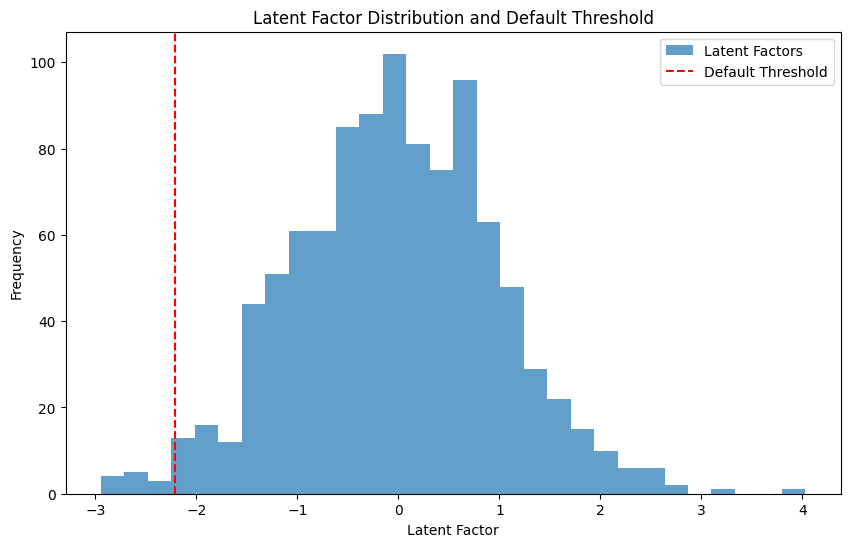

RMSE for 0-3% Tranche: 19.0040
RMSE for 3-7% Tranche: 0.6040
RMSE for 7-15% Tranche: 2.1580
RMSE for 15-100% Tranche: 3.1120
RMSE for Index Tranche: 35.5800


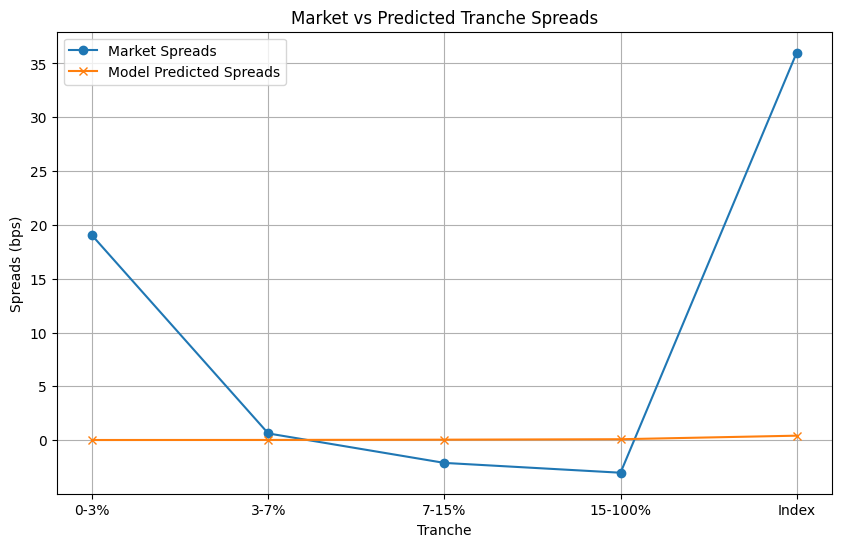

<function matplotlib.pyplot.show(close=None, block=None)>

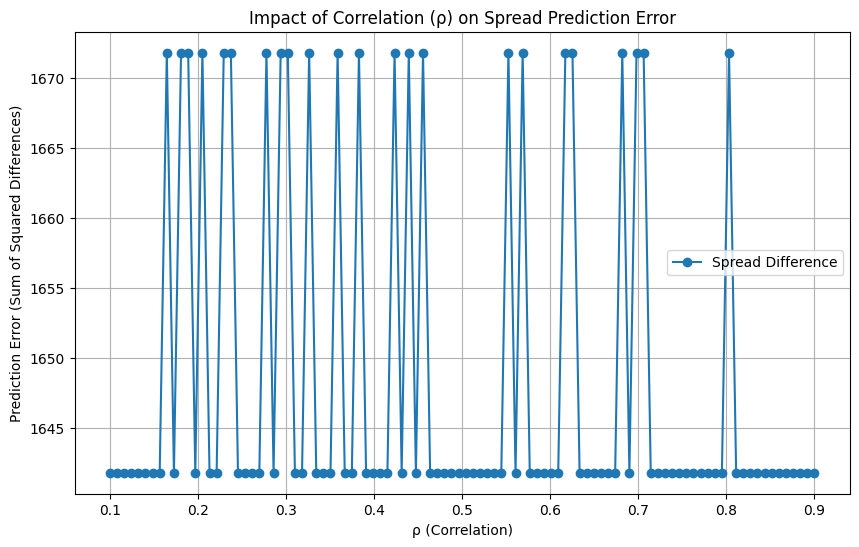

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Gaussian Copula Model Definition
def gaussian_copula(latent_factors, rho):
    """
    Gaussian copula model to compute joint probabilities.
    :param latent_factors: Array of latent variables for obligors.
    :param rho: Correlation parameter.
    """
    z_common = norm.ppf(latent_factors)
    z_independent = np.sqrt(1 - rho**2) * norm.ppf(np.random.rand(len(latent_factors)))
    return rho * z_common + z_independent

# Step 2: Generate Default Probabilities
def compute_default_probabilities(single_name_spreads, recovery_rate):
    """
    Compute default probabilities based on single-name CDS spreads.
    :param single_name_spreads: Array of CDS spreads for individual obligors.
    :param recovery_rate: Assumed recovery rate.
    :return: Default probabilities for each obligor.
    """
    spreads_in_decimal = single_name_spreads / 10000  # Convert basis points to decimals
    default_probabilities = 1 - np.exp(-spreads_in_decimal / (1 - recovery_rate))
    return default_probabilities

# Step 3: Loss Calculation for Each Tranche
def calculate_loss(latent_factors, default_threshold, attachment, detachment):
    """
    Calculate loss for a given tranche using latent variables.
    :param latent_factors: Latent factors from the Gaussian Copula.
    :param default_threshold: Threshold for default.
    :param attachment: Attachment point of the tranche.
    :param detachment: Detachment point of the tranche.
    """
    defaults = (latent_factors < default_threshold).astype(int)
    loss = np.clip(np.sum(defaults) - attachment, 0, detachment - attachment)
    return loss

# Step 4: Model Calibration
def calibrate_copula(single_name_spreads, tranche_spreads, recovery_rate):
    """
    Calibrate Gaussian Copula model by minimizing errors between model and market spreads.
    :param single_name_spreads: Array of single-name CDS spreads.
    :param tranche_spreads: Array of market-observed tranche spreads.
    :param recovery_rate: Assumed recovery rate.
    """
    def objective_function(rho):
        np.random.seed(42)  # Fixing seed for reproducibility
        default_probabilities = compute_default_probabilities(single_name_spreads, recovery_rate)
        latent_factors = gaussian_copula(np.random.rand(len(single_name_spreads)), rho)
        estimated_spreads = []
        for attachment, detachment, observed_spread in tranche_spreads:
            default_threshold = norm.ppf(default_probabilities.mean())  # Default threshold for all obligors
            tranche_loss = calculate_loss(latent_factors, default_threshold, attachment, detachment)
            estimated_spreads.append(np.mean(tranche_loss) * (1 - recovery_rate))
        return np.sum((np.array(estimated_spreads) - tranche_spreads[:, 2])**2)

    result = minimize(objective_function, x0=0.5, bounds=[(0, 1)], method='L-BFGS-B')
    return result.x[0]

# Step 5: RMSE Calculation
def calculate_rmse(latent_factors, tranche_spreads, recovery_rate, default_probabilities):
    """
    Calculate RMSE for each tranche.
    :param latent_factors: Latent factors from Gaussian Copula.
    :param tranche_spreads: Array of market-observed tranche spreads.
    :param recovery_rate: Assumed recovery rate.
    :param default_probabilities: Default probabilities for obligors.
    """
    rmses = []
    for attachment, detachment, observed_spread in tranche_spreads:
        default_threshold = norm.ppf(default_probabilities.mean())
        tranche_loss = calculate_loss(latent_factors, default_threshold, attachment, detachment)
        estimated_spread = np.mean(tranche_loss) * (1 - recovery_rate)
        rmse = np.sqrt((estimated_spread - observed_spread)**2)
        rmses.append(rmse)
    return rmses

# Step 6: Input Data Integration
# Example: single_name_spreads from filtered_data
single_name_spreads = filtered_data.iloc[:, 1:].mean(axis=1).values  # Placeholder spreads; replace with your data

# Use merged_df to construct tranche_spreads


# Construct tranche_spreads
tranche_spreads = np.array([
    [0, 0.03, merged_df['Price_0-3%'].iloc[0]],
    [0.03, 0.07, merged_df['Price_3-7%'].iloc[0]],
    [0.07, 0.15, merged_df['Price_7-15%'].iloc[0]],
    [0.15, 0.30, merged_df['Price_15-100%'].iloc[0]],
    [0.30, 1.00, merged_df['Price_index'].iloc[0]]
])

recovery_rate = 0.4

# Step 7: Calibration
rho = calibrate_copula(single_name_spreads, tranche_spreads, recovery_rate)
print(f"Calibrated rho: {rho:.4f}")

# Step 8: Visualization
np.random.seed(20)  # Fixing seed for reproducibility
latent_factors = gaussian_copula(np.random.rand(1000), rho)
default_probabilities = compute_default_probabilities(single_name_spreads, recovery_rate)
default_threshold = norm.ppf(default_probabilities.mean())

plt.figure(figsize=(10, 6))
plt.hist(latent_factors, bins=30, alpha=0.7, label='Latent Factors')
plt.axvline(default_threshold, color='red', linestyle='--', label='Default Threshold')
plt.title("Latent Factor Distribution and Default Threshold")
plt.xlabel("Latent Factor")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 9: RMSE Calculation
rmses = calculate_rmse(latent_factors, tranche_spreads, recovery_rate, default_probabilities)
tranche_names = ['0-3%', '3-7%', '7-15%', '15-100%', 'Index']
for name, rmse in zip(tranche_names, rmses):
    print(f"RMSE for {name} Tranche: {rmse:.4f}")

# Step 10: Plot Market vs Predicted Spreads
predicted_spreads = []
for attachment, detachment, observed_spread in tranche_spreads:
    default_threshold = norm.ppf(default_probabilities.mean())
    tranche_loss = calculate_loss(latent_factors, default_threshold, attachment, detachment)
    predicted_spreads.append(np.mean(tranche_loss) * (1 - recovery_rate))

market_spreads = tranche_spreads[:, 2]  # Market observed spreads

plt.figure(figsize=(10, 6))
plt.plot(tranche_names[:len(market_spreads)], market_spreads, label='Market Spreads', marker='o')
plt.plot(tranche_names[:len(predicted_spreads)], predicted_spreads, label='Model Predicted Spreads', marker='x')
plt.title("Market vs Predicted Tranche Spreads")
plt.xlabel("Tranche")
plt.ylabel("Spreads (bps)")
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Impact of Correlation (ρ) on Spread Prediction
rhos = np.linspace(0.1, 0.9, 100)  # Different rho values
spread_differences = []

for rho in rhos:
    latent_factors = gaussian_copula(np.random.rand(len(single_name_spreads)), rho)
    predicted_spreads = []
    for attachment, detachment, observed_spread in tranche_spreads:
        default_threshold = norm.ppf(default_probabilities.mean())
        tranche_loss = calculate_loss(latent_factors, default_threshold, attachment, detachment)
        predicted_spreads.append(np.mean(tranche_loss) * (1 - recovery_rate))
    spread_differences.append(np.sum((np.array(predicted_spreads) - market_spreads)**2))

plt.figure(figsize=(10, 6))
plt.plot(rhos, spread_differences, label='Spread Difference', marker='o')
plt.title("Impact of Correlation (ρ) on Spread Prediction Error")
plt.xlabel("ρ (Correlation)")
plt.ylabel("Prediction Error (Sum of Squared Differences)")
plt.grid(True)
plt.legend()
plt.show
